In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

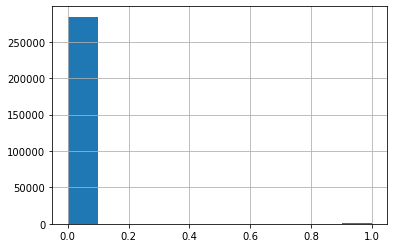

In [5]:
df['Class'].hist()

In [6]:
#Balancing DATA
#frauds = df[df['Class'] == 1].shape[0]
#df_no_fraud = (df[df['Class'] == 0].sample(frauds))
#df_no_fraud.shape
#df_fraud = df[df['Class'] == 1]
#df_fraud.shape
#df_new = pd.concat([df_no_fraud,df_fraud])
#df_new.shape

In [7]:

#Y = df_new['Class'].reset_index(drop=True)
#X = df_new.drop(['Class'], axis=1)


In [8]:
# find correlation of all columns to all other columns
df.corr().head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


In [9]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_style("darkgrid")

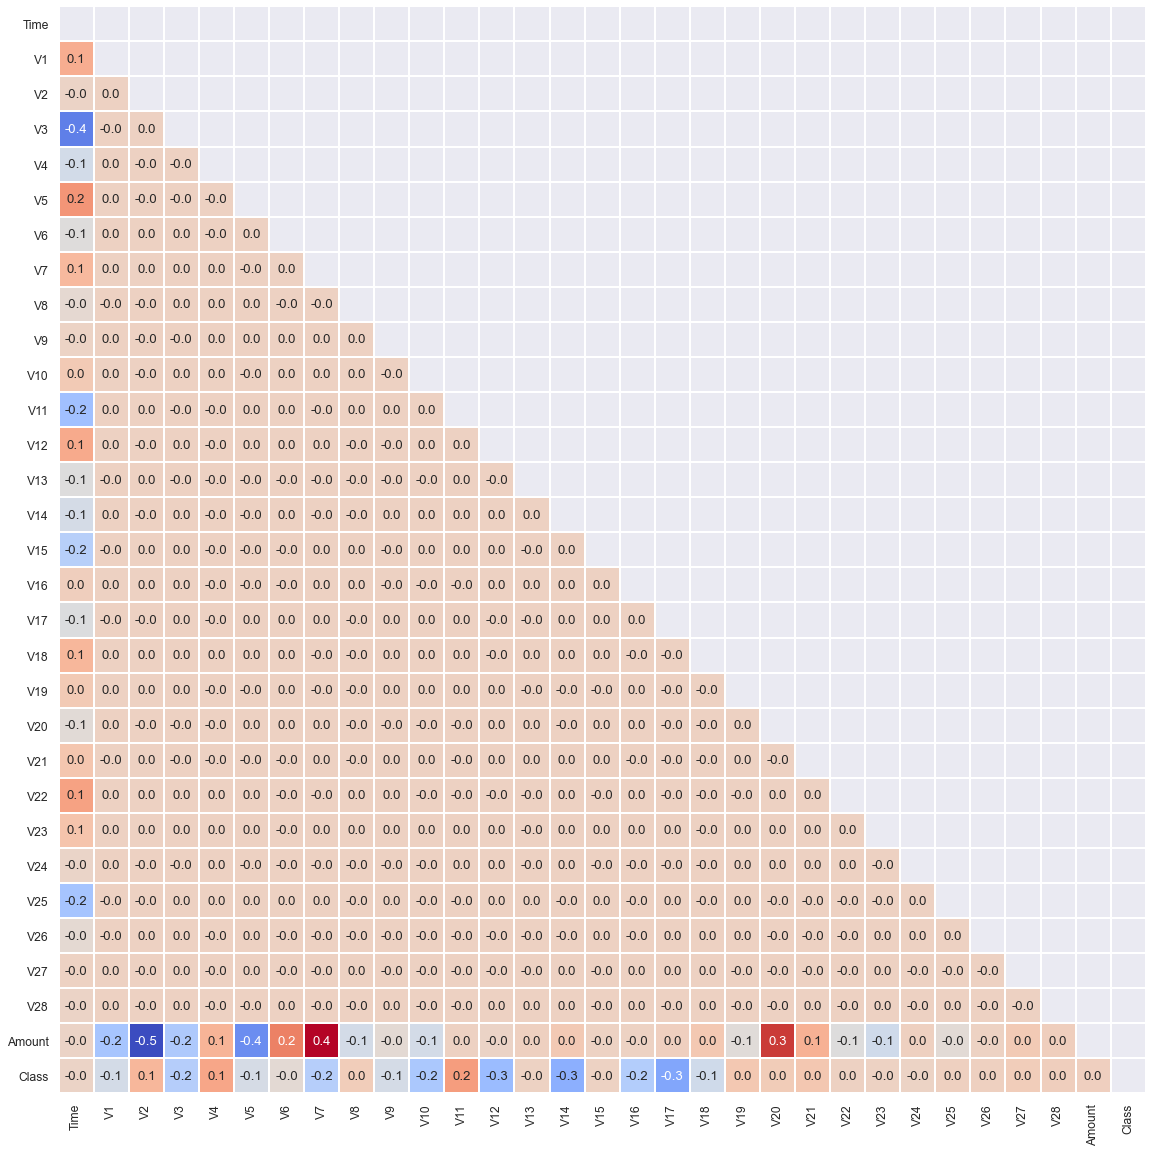

In [10]:
# Display numerical correlations (pearson) between features on heatmap.

sns.set(font_scale=1.1)
correlation_train = df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [11]:
outlier_count = df[df['Class'] == 1]['Class'].count()
outlier_count=(outlier_count/df.shape[0])

In [12]:
# Separate Input features X and Class variable Y
X = df.loc[:, ~df.columns.isin(['Class'])]
Y = df.loc[:,'Class']

In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 

In [14]:

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

In [15]:
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X = normalize(X) 

In [16]:
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X) 

In [17]:
train_set_percentage = 0.5
# select 30% of the entire class 1 (fraudulent transactions) data in order to train the model 
fraud_series = df[df['Class'] == 1]
idx = fraud_series.index.values
np.random.shuffle(idx)
fraud_series.drop(idx[:int(idx.shape[0]*train_set_percentage)], inplace=True)
df.drop(fraud_series.index.values, inplace=True)


C:\Users\rajar\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# normal dataset with the same size of the fraud_series (training dataset)
normal_series = df[df['Class'] == 0] 
idx = normal_series.index.values
np.random.shuffle(idx)
normal_series.drop(idx[fraud_series.shape[0]:], inplace=True)
df.drop(normal_series.index.values, inplace=True)


In [19]:
# build the training dataset
new_dataset = pd.concat([normal_series, fraud_series])
new_dataset.reset_index(inplace=True, drop=True)
y = new_dataset['Class'].values                 #   .reshape(-1, 1)
new_dataset.drop(['Class'], axis=1, inplace=True)
X = new_dataset

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [21]:
# Attributes that will be used by the gridsearchCV algorithm 
attr={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
      'gamma': [1e-1, 1e-2, 1e-3]
     }

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=10)


In [23]:
model = SVC()
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)
print('Accuracy: ',accuracy_score(y_pred, y_test))

Accuracy:  0.9797297297297297


In [24]:
y_all = df['Class'].values
df.drop(['Class'], axis=1, inplace=True)
X_all = df
y_pred_all = classif.predict(X_all)
print(confusion_matrix(y_all, y_pred_all))

[[   260 283809]
 [     0    246]]


In [25]:
print(recall_score(y_all, y_pred_all))

1.0
